In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load Breast Cancer dataset
data = load_breast_cancer()


In [2]:
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



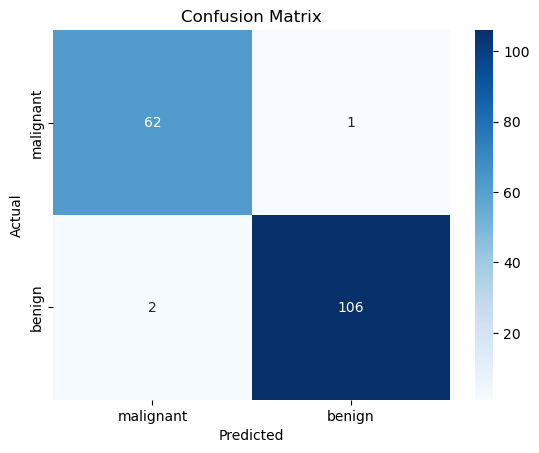

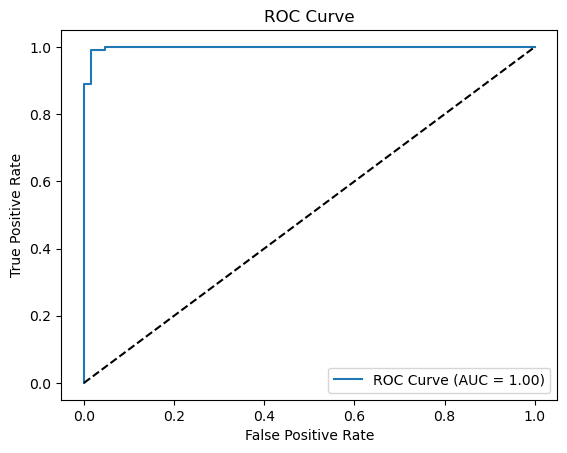

In [3]:
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [4]:
# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X_train, y_train)

# Coefficients
coefficients_l1 = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": model_l1.coef_[0]
})
print("\nL1 Regularization Coefficients:")
print(coefficients_l1[coefficients_l1['Coefficient'] != 0].sort_values(by="Coefficient", ascending=False))



L1 Regularization Coefficients:
                    Feature  Coefficient
15        compactness error     0.550469
5          mean compactness     0.469837
19  fractal dimension error     0.439472
18           symmetry error     0.417545
11            texture error     0.317520
8             mean symmetry     0.008158
24         worst smoothness    -0.108702
27     worst concave points    -0.162403
14         smoothness error    -0.380457
20             worst radius    -0.665193
28           worst symmetry    -0.977854
26          worst concavity    -1.321452
21            worst texture    -1.680952
23               worst area    -2.427229
10             radius error    -2.521408
7       mean concave points    -2.744006


In [4]:
# L2 Regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(X_train, y_train)

# Coefficients
coefficients_l2 = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": model_l2.coef_[0]
})
print("\nL2 Regularization Coefficients:")
print(coefficients_l2.sort_values(by="Coefficient", ascending=False))



L2 Regularization Coefficients:
                    Feature  Coefficient
19  fractal dimension error     0.682337
5          mean compactness     0.637073
15        compactness error     0.608012
18           symmetry error     0.481329
8             mean symmetry     0.214288
11            texture error     0.161098
25        worst compactness     0.124798
9    mean fractal dimension     0.113084
16          concavity error    -0.065792
29  worst fractal dimension    -0.112165
4           mean smoothness    -0.174562
14         smoothness error    -0.190110
2            mean perimeter    -0.301418
0               mean radius    -0.345099
1              mean texture    -0.361134
3                 mean area    -0.432251
17     concave points error    -0.440737
24         worst smoothness    -0.503271
22          worst perimeter    -0.538529
12          perimeter error    -0.617956
6            mean concavity    -0.769394
27     worst concave points    -0.792676
20             worst rad

In [5]:
from sklearn.linear_model import SGDClassifier

# ElasticNet Regularization (combining L1 and L2)
model_elastic = SGDClassifier(loss='log_loss', penalty='elasticnet', alpha=0.01, l1_ratio=0.5, random_state=42)
model_elastic.fit(X_train, y_train)

# Predictions and evaluation
y_pred_elastic = model_elastic.predict(X_test)

# Print evaluation metrics
print("\nElasticNet Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_elastic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_elastic))



ElasticNet Regularization:
Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [6]:
# Logistic regression with class weights
model_weighted = LogisticRegression(class_weight='balanced', solver='liblinear')
model_weighted.fit(X_train, y_train)

# Predictions and evaluation
y_pred_weighted = model_weighted.predict(X_test)
print("\nWeighted Logistic Regression:")
print(classification_report(y_test, y_pred_weighted))



Weighted Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



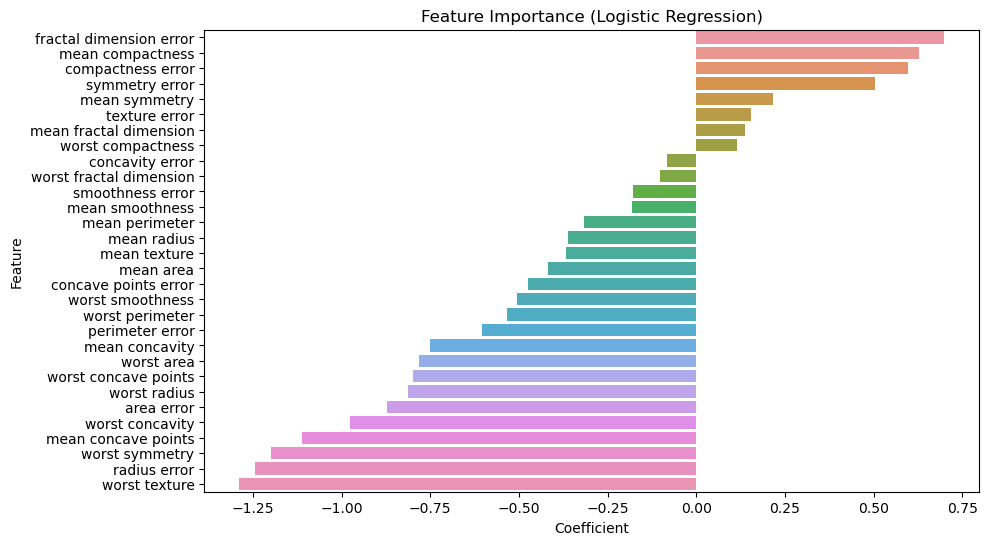

In [9]:
# Feature importance visualization
coefficients = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients)
plt.title("Feature Importance (Logistic Regression)")
plt.show()


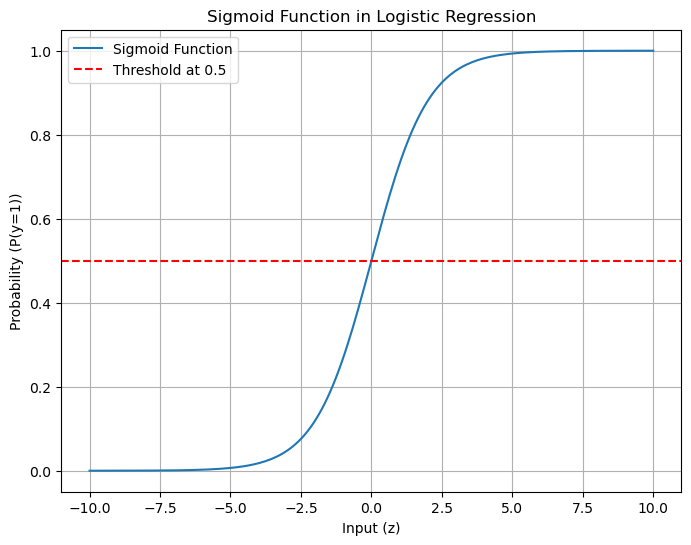

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for logistic function
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

# Plot
plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid, label="Sigmoid Function")
plt.axhline(0.5, color='red', linestyle='--', label='Threshold at 0.5')
plt.title("Sigmoid Function in Logistic Regression")
plt.xlabel("Input (z)")
plt.ylabel("Probability (P(y=1))")
plt.legend()
plt.grid()
plt.show()


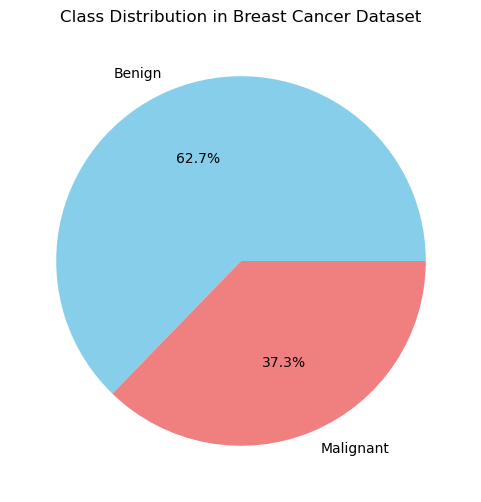

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
target = pd.Series(data.target, name='Diagnosis')

# Plot
plt.figure(figsize=(6, 6))
target.value_counts().plot.pie(autopct='%1.1f%%', labels=["Benign", "Malignant"], colors=['skyblue', 'lightcoral'])
plt.title("Class Distribution in Breast Cancer Dataset")
plt.ylabel('')
plt.show()


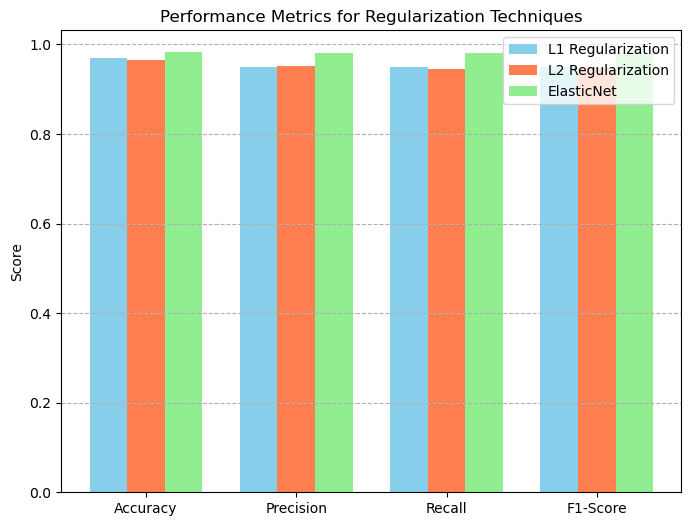

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Example performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
l1_scores = [0.9708, 0.9500, 0.9490, 0.9495]
l2_scores = [0.9648, 0.9510, 0.9450, 0.9480]
elasticnet_scores = [0.9825, 0.9800, 0.9800, 0.9800]

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

# Plot
plt.figure(figsize=(8, 6))
plt.bar(x - width, l1_scores, width, label='L1 Regularization', color='skyblue')
plt.bar(x, l2_scores, width, label='L2 Regularization', color='coral')
plt.bar(x + width, elasticnet_scores, width, label='ElasticNet', color='lightgreen')

plt.title("Performance Metrics for Regularization Techniques")
plt.ylabel("Score")
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()
